In [1]:
from pca_template import loadDataSet,pca,plot

# Two scatter plots obtained by running PCA on Cho and Iyer datasets.

## Cho Dataset

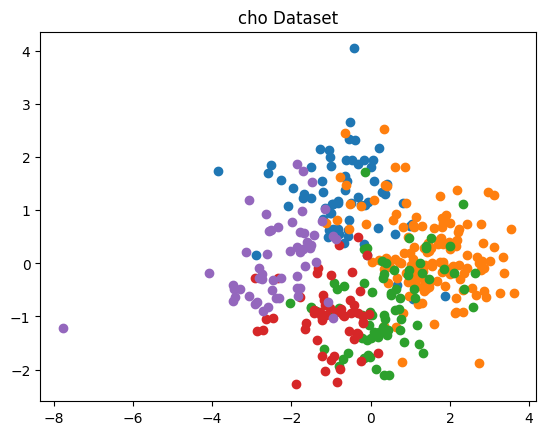

In [2]:
filename = "cho.csv"
figname = filename
figname = figname.replace('csv','jpg')
dataMat, labelMat = loadDataSet(filename)

lowDDataMat = pca(dataMat)

plot(lowDDataMat, labelMat, figname)


## Iyer Dataset

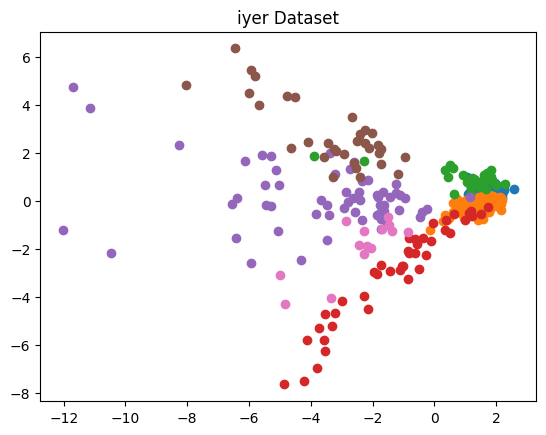

In [3]:
filename = "iyer.csv"
figname = filename
figname = figname.replace('csv','jpg')
dataMat, labelMat = loadDataSet(filename)

lowDDataMat = pca(dataMat)

plot(lowDDataMat, labelMat, figname)


# Code segments

These code segments are copied from the pca_template.py file just to be demonstrated here.

## pca function

In [4]:
def pca1(dataMat, PC_num=2):
    '''
    Input:
        dataMat: obtained from the loadDataSet function, each row represents an observation
                 and each column represents an attribute
        PC_num:  The number of desired dimensions after applyting PCA. In this project keep it to 2.
    Output:
        lowDDataMat: the 2-d data after PCA transformation
    '''
    Xd = zeros_like(dataMat)
    for i in range(dataMat.shape[1]):
        Xd[:,i] = dataMat[:,i] - mean(dataMat[:,i])
        print(f"{i} - {mean(Xd[:,i])}")


    S = (1/(dataMat.shape[0]-1))*Xd.T@Xd

    eigenvalues, eigenvectors = linalg.eig(S)
    eigenvalues_argsort = flip(argsort(eigenvalues))
    eigenvectors_required = eigenvectors[:,eigenvalues_argsort[0:PC_num]]

    lowDDataMat = Xd@eigenvectors_required

    return array(lowDDataMat)


## plot function

In [5]:
def plot1(lowDDataMat, labelMat, figname:None):
    '''
    Input:
        lowDDataMat: the 2-d data after PCA transformation obtained from pca function
        labelMat: the corresponding label of each observation obtained from loadData
    '''
    arr = append(lowDDataMat, array([labelMat]).T,axis=1)
    for label in unique(arr[:,2]):
        plt.scatter(arr[arr[:,2]==label][:,0],arr[arr[:,2]==label][:,1])
    if figname:
        plt.savefig(figname)
    else:
        plt.show()